In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Categories

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

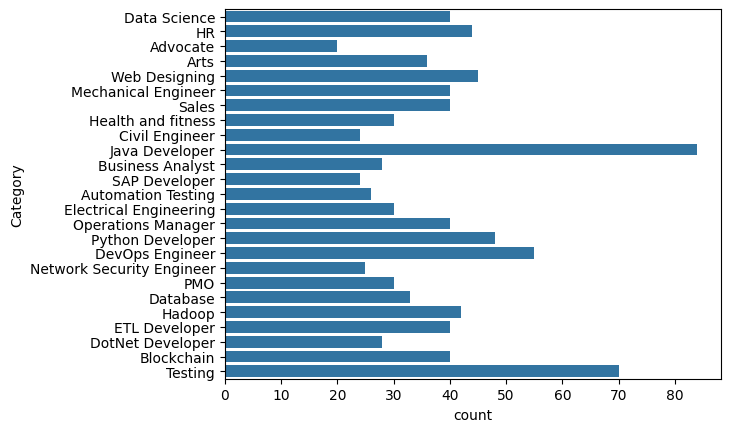

In [6]:
sns.countplot(df['Category'])
plt.show()

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1144\2101950484.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


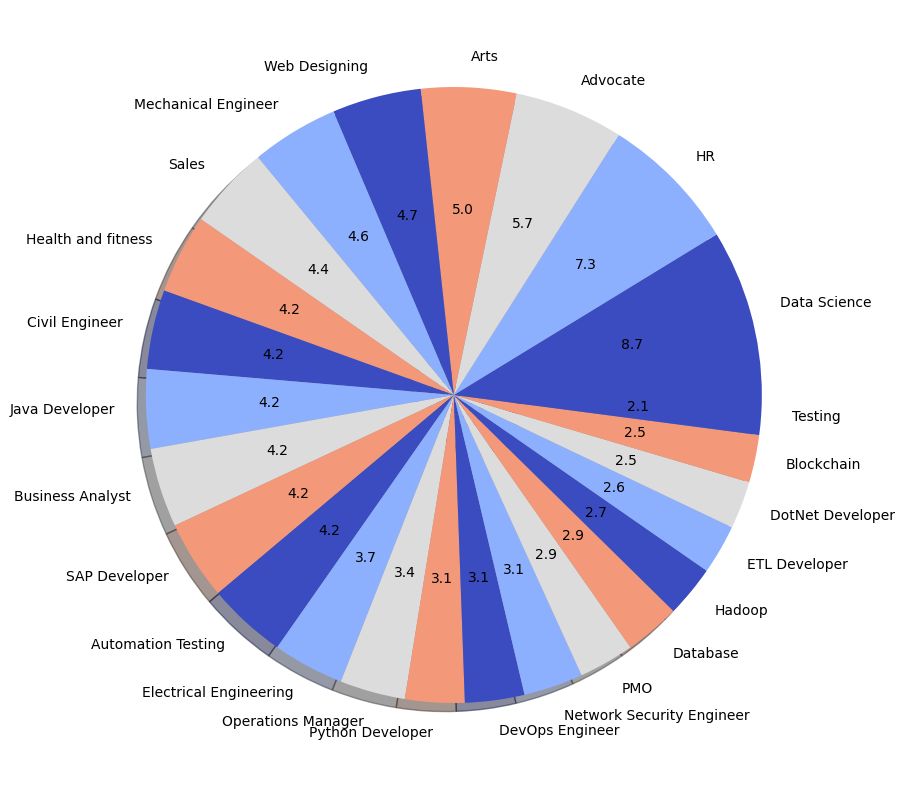

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

# colormap = plt.cm.coolwarm(np.linspace(0,1,3))
colormap = plt.cm.get_cmap('coolwarm')
colors = [colormap(i/4) for i in range(4)]

plt.figure(figsize=(15,10))
plt.pie(counts,
        labels=labels, 
        autopct='%1.1f',
        shadow=True,
        colors=colors)
plt.show()

# Exploring Resume

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data
1. URLs
2. hastags
3. mentions
4. special letters
5. punctuations

In [10]:
import re
def clean_resume(text):
    clean_text = re.sub(r'http\S+\s',' ', text)  #url
    # clean_text = re.sub(r'RT|cc',' ', clean_text)
    clean_text = re.sub(r'#\S+\s',' ', clean_text)
    clean_text = re.sub(r'@\S+',' ', clean_text)
    clean_text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]',' ', clean_text)
    clean_text = re.sub(r'\s+',' ', clean_text)
    return clean_text

In [11]:
clean_resume('my ### #raka website like is this http://heloworld and access it by @example.com ')

'my website like is this and access it by '

In [12]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [13]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

# Words Into Categorical Values

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [16]:
df['Category'].unique()
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

In [26]:
tfidf

TfidfVectorizer(stop_words='english')

# Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [20]:
X_train.shape

(769, 7347)

In [21]:
X_test.shape

(193, 7347)

# Training Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9844559585492227


# Pickling

In [28]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))

# Prediction

In [31]:
data_analyst_resume = """
Raka Febrian Syahputra
Email: raka@example.com
Phone: +62 8123456789
GitHub: https://github.com/rakafebriansy
Portfolio: https://bit.ly/portfolio-raka

Objective:
Detail-oriented and analytical Data Analyst with 3+ years of experience in data analysis, data visualization, and reporting. Proficient in working with large datasets, identifying trends, and generating actionable insights to help businesses make data-driven decisions. Seeking a challenging position where I can leverage my skills in data analysis and problem-solving to contribute to organizational growth.

Education:
Bachelor of Science in Computer Science
University of Jember - 2022
Relevant Coursework: Data Structures, Data Analysis, Statistical Modeling, Database Management, Machine Learning.

Technical Skills:
- Programming Languages: Python, R, SQL
- Data Analysis Tools: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- Database Management: MySQL, PostgreSQL
- Data Visualization: Tableau, Power BI, Google Data Studio
- Statistical Analysis: Hypothesis Testing, Regression Analysis, A/B Testing
- Machine Learning: Logistic Regression, Decision Trees, Random Forests
- Other Tools: Excel, Jupyter Notebooks, Git

Professional Experience:
Data Analyst
XYZ Analytics Company, Banda Neira — 02/2024 to Present
- Analyzed and cleaned large datasets from multiple sources using Python (Pandas, NumPy) to ensure accuracy and reliability.
- Created automated reporting tools and dashboards in Tableau to monitor key performance indicators (KPIs) and deliver insights to stakeholders.
- Conducted A/B testing and regression analysis to help optimize marketing strategies, resulting in a 15% increase in campaign conversion rates.
- Collaborated with cross-functional teams to understand data needs and provided actionable insights to inform business decisions.

Junior Data Analyst
ABC Solutions, Jakarta — 08/2023 to 12/2023
- Assisted in the design and implementation of SQL queries for data extraction, transformation, and loading (ETL) processes.
- Developed data visualizations and reports for internal teams, helping stakeholders track trends and business performance.
- Supported senior analysts in data cleaning and data mining tasks to prepare datasets for analysis.
- Conducted exploratory data analysis (EDA) to identify patterns and outliers in datasets, contributing to reports for project development.

Projects:
1. Customer Segmentation Analysis
   Tools: Python, KMeans, Pandas, Matplotlib
   https://github.com/rakafebriansy/customer-segmentation
   - Performed clustering analysis on customer data to segment customers based on purchasing behavior.
   - Created visualizations to highlight patterns in customer demographics and purchasing habits, improving marketing targeting strategies.

2. Sales Forecasting Model
   Tools: Python, ARIMA, Scikit-learn
   https://github.com/rakafebriansy/sales-forecasting
   - Developed a time series forecasting model to predict sales trends for a retail company.
   - Used ARIMA and regression techniques to forecast future sales, helping to improve inventory management.

3. Marketing Campaign Performance Dashboard
   Tools: Tableau, SQL
   https://github.com/rakafebriansy/marketing-campaign
   - Built an interactive dashboard in Tableau to track and analyze the performance of digital marketing campaigns across multiple channels.
   - Provided actionable insights that led to a 10% improvement in campaign ROI.

Certifications:
- Google Data Analytics Certificate - Coursera
- Tableau Desktop Specialist - Tableau
- SQL for Data Science - Coursera

Additional Information:
- Languages: English (Fluent), Indonesia (Fluent), French (Intermediate)
- Interests: Data Science, Machine Learning, Digital Marketing
"""


In [39]:
dotnet_resume = """
Raka Febrian Syahputra
Email: raka@example.com
Phone: +62 8123456789
GitHub: https://github.com/rakafebriansy
Portfolio: https://bit.ly/portfolio-raka

Objective:
Dedicated .NET Developer with 3+ years of experience in building robust and scalable applications using the Microsoft .NET framework. Proficient in developing, testing, and deploying web and desktop applications, with expertise in C#, ASP.NET Core, and SQL Server. Seeking a challenging position to leverage my skills in delivering high-quality software solutions.

Education:
Bachelor of Science in Computer Science
University of Jember - 2022
Relevant Coursework: Software Engineering, Database Systems, Web Development, Algorithms, Object-Oriented Programming.

Technical Skills:
- Languages: C#, ASP.NET Core, VB.NET, JavaScript, HTML5, CSS3
- Frameworks: .NET Framework, .NET Core, Entity Framework
- Databases: SQL Server, MySQL, PostgreSQL
- Web Development: ASP.NET MVC, Blazor, Razor Pages, RESTful APIs
- Tools & Platforms: Visual Studio, Azure DevOps, Git, Docker
- Other Skills: LINQ, SignalR, Microservices, Unit Testing (xUnit, NUnit)

Professional Experience:
.NET Developer
XYZ Analytics Company, Banda Neira — 02/2024 to Present
- Designed and developed scalable web applications using ASP.NET Core, Entity Framework, and SQL Server, improving performance by 20%.
- Built and consumed RESTful APIs for seamless integration with third-party services.
- Implemented authentication and authorization using Identity Framework and OAuth 2.0.
- Optimized database queries and performed database migrations using Entity Framework.
- Deployed applications to Azure, configured CI/CD pipelines using Azure DevOps.

Junior .NET Developer
ABC Solutions, Jakarta — 08/2023 to 12/2023
- Assisted in developing and maintaining desktop applications using Windows Forms and WPF.
- Enhanced existing applications by refactoring code and implementing best practices for clean architecture.
- Wrote unit and integration tests to ensure code quality and reliability.
- Collaborated with cross-functional teams to gather and analyze software requirements.

Projects:
1. E-Commerce Platform
   Tools: ASP.NET Core, SQL Server, Angular
   https://github.com/rakafebriansy/e-commerce-platform
   - Developed an end-to-end e-commerce platform with product catalog, shopping cart, and payment gateway integration.
   - Implemented role-based access control (RBAC) for admin and user management.

2. Inventory Management System
   Tools: Windows Forms, Entity Framework, SQL Server
   https://github.com/rakafebriansy/inventory-management
   - Built a desktop application to manage inventory and track stock levels in real-time.
   - Automated reporting and analytics features using LINQ and Microsoft Reporting Services.

3. Real-Time Chat Application
   Tools: SignalR, ASP.NET Core, JavaScript
   https://github.com/rakafebriansy/real-time-chat
   - Developed a real-time chat application with WebSocket-based communication using SignalR.
   - Integrated user presence tracking and message notifications for a seamless user experience.

Certifications:
- Microsoft Certified: Azure Developer Associate
- Microsoft Certified: .NET Fundamentals
- Certified Scrum Developer (CSD)

Additional Information:
- Languages: English (Fluent), Indonesia (Fluent), French (Intermediate)
- Interests: Cloud Computing, Clean Architecture, Software Design Patterns
"""

In [40]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = clean_resume(dotnet_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_map = {
    15: 'Java Developer',
    23: 'Testing',
    8: 'DevOps Engineer',
    20: 'Python Developer',
    24: 'Web Designing',
    12: 'HR',
    13: 'Hadoop',
    3: 'Blockchain',
    10: 'ETL Developer',
    18: 'Operations Manager',
    6: 'Data Science',
    22: 'Sales',
    16: 'Mechanical Engineer',
    1: 'Arts',
    7: 'Database',
    11: 'Electrical Engineering',
    14: 'Health and Fitness',
    19: 'PMO',
    4: 'Business Analyst',
    9: 'DotNet Developer',
    2: 'Automation Testing',
    17: 'Network Security Engineer',
    21: 'SAP Developer',
    5: 'Civil Engineer',
    0: 'Advocate'
}

category_name = category_map.get(prediction_id,  'unknown')
print('Predicted Category: ', category_name)

Predicted Category:  DotNet Developer
